# Preprocess plays data for naive model

In [7]:
import pandas as pd
from Preprocessing_v1 import *
from DataLoader import load_data
import matplotlib.pyplot as plt

In [2]:
[games_df, players_df, plays_df, tracking_df] = load_data()

loaded games df
shape: (136, 9)
-----
loaded players df
shape: (1683, 7)
-----
loaded plays df
shape: (12486, 35)
-----
loading tracking frames...
loaded tracking frames
shape: (12187398, 17)
returning 4 frames


In [3]:
plays_df_clean = preprocess_plays_df_naive_models(plays_df, games_df)
plays_df_clean.head()

final plays data shape: (6840, 289)


,gameId,week,playId,ballCarrierId,quarter,down,yardsToGo,preSnapHomeScore,preSnapVisitorScore,TARGET,...,possessionTeam_NO,possessionTeam_NYG,possessionTeam_NYJ,possessionTeam_PHI,possessionTeam_PIT,possessionTeam_SEA,possessionTeam_SF,possessionTeam_TB,possessionTeam_TEN,possessionTeam_WAS
0,2022090800,1,3304,52494,4,2,6,10,31,2,...,0,0,0,0,0,0,0,0,0,0
1,2022090800,1,2648,46076,3,2,10,10,17,3,...,0,0,0,0,0,0,0,0,0,0
2,2022090800,1,2072,47857,3,1,10,10,10,1,...,0,0,0,0,0,0,0,0,0,0
3,2022090800,1,2093,46076,3,2,9,10,10,7,...,0,0,0,0,0,0,0,0,0,0
4,2022090800,1,1946,47853,3,1,10,10,10,2,...,0,0,0,0,0,0,0,0,0,0


In [4]:
non_ballCarrier_cols = [col for col in plays_df_clean.columns if "ballCarrier" not in col]
plays_df_clean[non_ballCarrier_cols].dtypes

gameId                int64
week                  int64
playId                int64
quarter               int64
down                  int64
                      ...  
possessionTeam_SEA    uint8
possessionTeam_SF     uint8
possessionTeam_TB     uint8
possessionTeam_TEN    uint8
possessionTeam_WAS    uint8
Length: 83, dtype: object

## Data exploration

(array([   5.,   24.,  147.,  410., 2143., 1488., 1278.,  453.,  340.,
         143.,  146.,   58.,   56.,   27.,   24.,   15.,   15.,    6.,
          11.,    8.]),
 array([-10. ,  -7.5,  -5. ,  -2.5,   0. ,   2.5,   5. ,   7.5,  10. ,
         12.5,  15. ,  17.5,  20. ,  22.5,  25. ,  27.5,  30. ,  32.5,
         35. ,  37.5,  40. ]),
 <BarContainer object of 20 artists>)

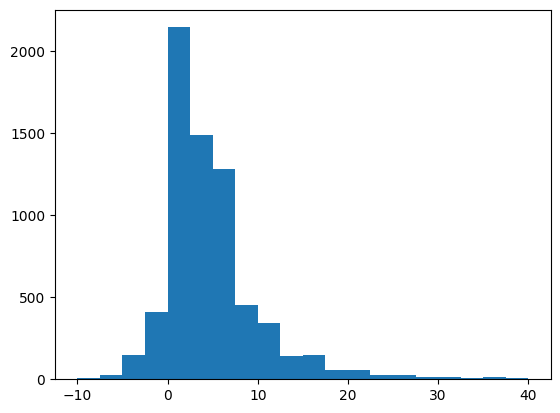

In [14]:
plt.hist(plays_df_clean['TARGET'], bins = 20, range = (-10, 40))

In [11]:
plays_df_clean['TARGET'].describe()

count    6840.000000
mean        4.827193
std         6.689528
min       -26.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        79.000000
Name: TARGET, dtype: float64

In [26]:
len(plays_df_clean[plays_df_clean['TARGET'] < -5])

30

In [27]:
len(plays_df_clean[plays_df_clean['TARGET'] < -2])

177

In [28]:
len(plays_df_clean[plays_df_clean['TARGET'] < -0])

587

In [29]:
len(plays_df_clean[plays_df_clean['TARGET'] > 20])

179

In [31]:
len(plays_df_clean[plays_df_clean['TARGET'] > 30])

73

In [32]:
# Drop observations less than -5 yards and more than 30 yards

In [35]:
plays_df_filtered = plays_df_clean[(plays_df_clean['TARGET'] > -5) & (plays_df_clean['TARGET'] < 30)]
len(plays_df_filtered)

6703

(array([ 291.,  770., 1614., 1488.,  972.,  759.,  231.,  197.,  104.,
          97.,   83.,   31.,   27.,   15.,   24.]),
 array([-4. , -1.8,  0.4,  2.6,  4.8,  7. ,  9.2, 11.4, 13.6, 15.8, 18. ,
        20.2, 22.4, 24.6, 26.8, 29. ]),
 <BarContainer object of 15 artists>)

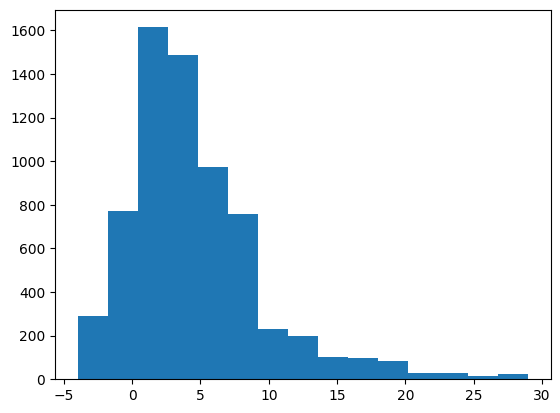

In [38]:
plt.hist(plays_df_filtered['TARGET'], bins = 15)

In [ ]:
# Bins
# Less than -2
# -2 - 0 
# 0 - 1
# 1 - 2.5
# 2.5 - 5
# 5 - 10
# Greater than 10

In [40]:
len(plays_df_clean[(plays_df_clean['TARGET'] > 10) & (plays_df_clean['TARGET'] < 100)])

777